# Apps dataset

## Data Exploration

In [59]:
import pandas as pd
import numpy as np

In [60]:
apps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks gogirl/csv_files/apps.csv')

In [61]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [62]:
apps.shape

(9659, 14)

In [63]:
apps.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [64]:
apps.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [65]:
apps.duplicated().sum()

0

In [66]:
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data cleaning

In [67]:
apps.drop('Unnamed: 0', axis=1, inplace=True)

In [68]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Filling Ratings missing data

Filling it with the average dater for each category

In [69]:
average_ratings = apps[apps['Rating'].notna()].groupby('Category')['Rating'].mean().round(1)
print(average_ratings)

Category
ART_AND_DESIGN         4.4
AUTO_AND_VEHICLES      4.2
BEAUTY                 4.3
BOOKS_AND_REFERENCE    4.3
BUSINESS               4.1
COMICS                 4.2
COMMUNICATION          4.1
DATING                 4.0
EDUCATION              4.4
ENTERTAINMENT          4.1
EVENTS                 4.4
FAMILY                 4.2
FINANCE                4.1
FOOD_AND_DRINK         4.2
GAME                   4.2
HEALTH_AND_FITNESS     4.2
HOUSE_AND_HOME         4.2
LIBRARIES_AND_DEMO     4.2
LIFESTYLE              4.1
MAPS_AND_NAVIGATION    4.0
MEDICAL                4.2
NEWS_AND_MAGAZINES     4.1
PARENTING              4.3
PERSONALIZATION        4.3
PHOTOGRAPHY            4.2
PRODUCTIVITY           4.2
SHOPPING               4.2
SOCIAL                 4.2
SPORTS                 4.2
TOOLS                  4.0
TRAVEL_AND_LOCAL       4.1
VIDEO_PLAYERS          4.0
WEATHER                4.2
Name: Rating, dtype: float64


In [70]:
apps['Rating'] = apps['Rating'].fillna(apps['Category'].map(average_ratings))
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Filling the Size column
Do this by calculating the corelation between itm the revies and the installsm if not correlatedm use interpolation

In [71]:
apps.rename(columns= {'Installs': 'Installs(+)'}, inplace=True)

In [72]:
# prompt: remove the + at the end of each installsm remove the commas and convert it to int

apps['Installs(+)'] = apps['Installs(+)'].str.replace('+', '')
apps['Installs(+)'] = apps['Installs(+)'].str.replace(',', '')
apps['Installs(+)'] = apps['Installs(+)'].astype('int')


In [73]:
print(apps['Reviews'].corr(apps['Size']))
print(apps['Installs(+)'].corr(apps['Size']))

0.17932146123982362
0.13429092244519006


In [74]:
apps['Size'] = apps['Size'].interpolate(method='spline', order=3)

### Last updated format

In [75]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], format='%B %d, %Y')

In [76]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Versions

In [77]:
apps['Current Ver'].dropna(inplace=True)
apps[apps['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs(+),Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7,5000,Free,0,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,0.0,1000000,Free,0,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7,500000,Free,0,Everyone,Tools,2017-05-10,NaN,4.0 and up
5772,BT Master,FAMILY,4.2,0,0.2,100,Free,0,Everyone,Education,2016-11-06,NaN,1.6 and up
6287,Dots puzzle,FAMILY,4.0,179,14.0,50000,Paid,$0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up
6360,Calculate My IQ,FAMILY,4.2,44,7.2,10000,Free,0,Everyone,Entertainment,2017-04-03,NaN,2.3 and up
6671,UFO-CQ,TOOLS,4.0,1,0.2,10,Paid,$0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up
9170,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,0.7,1000,Free,0,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up


In [78]:
apps['Android Ver'].dropna(axis=0)

0             4.0.3 and up
1             4.0.3 and up
2             4.0.3 and up
3               4.2 and up
4               4.4 and up
               ...        
9654            4.1 and up
9655            4.1 and up
9656            2.2 and up
9657    Varies with device
9658    Varies with device
Name: Android Ver, Length: 9657, dtype: object

In [79]:
apps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs(+)       0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

## EDA

In [80]:
apps['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

# User review dataset

## Dataset Exploration

In [81]:
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks gogirl/csv_files/user_reviews.csv')

In [82]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [83]:
reviews.shape

(64295, 5)

In [84]:
reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [85]:
reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [86]:
reviews.duplicated().sum()

33616

In [87]:
reviews.drop_duplicates(inplace=True)

In [88]:
reviews.isna().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [89]:
reviews.shape

(30679, 5)

In [90]:
reviews[reviews['Translated_Review'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
268,11st,NaN,Neutral,0.0,0.0
362,1LINE – One Line with One Touch,NaN,NaN,NaN,NaN
405,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,NaN,NaN,NaN,NaN
539,"2Date Dating App, Love and matching",NaN,NaN,NaN,NaN
...,...,...,...,...,...
64082,Hotspot Shield Free VPN Proxy & Wi-Fi Security,NaN,NaN,NaN,NaN
64119,Hotstar,NaN,NaN,NaN,NaN
64156,Hotwire Hotel & Car Rental App,NaN,NaN,NaN,NaN
64202,Housing-Real Estate & Property,NaN,NaN,NaN,NaN


In [91]:
# prompt: count the number of columns where translated review, sentiment, sentiment subjectivity and sentiment polarity are simultaneously none

import pandas as pd
count = 0
for index, row in reviews.iterrows():
    if pd.isna(row['Translated_Review']) and pd.isna(row['Sentiment']) and pd.isna(row['Sentiment_Subjectivity']) and pd.isna(row['Sentiment_Polarity']):
        count += 1
print(count)


982


In [92]:
# prompt: drop ccolums where both translated review and sentiments are empty

reviews = reviews.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Subjectivity', 'Sentiment_Polarity'], how='all')


In [93]:
reviews.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [94]:
reviews[reviews['Translated_Review'].isna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [95]:
reviews[reviews['Sentiment']=='Neutral']['Sentiment_Polarity'].value_counts()

Sentiment_Polarity
0.0    4361
Name: count, dtype: int64

In [96]:
reviews[reviews['Sentiment']=='Neutral']['Sentiment_Subjectivity'].value_counts()


Sentiment_Subjectivity
0.000000    3587
0.500000     136
0.100000      74
1.000000      65
0.600000      33
            ... 
0.331250       1
0.288889       1
0.428571       1
0.665000       1
0.280000       1
Name: count, Length: 130, dtype: int64

In [97]:
# prompt: fill the nan values of the translated revies for each app with a value where the sentiment of that particular app is neutral and both the sentiment polarities and subjectivities are zero

reviews['Translated_Review'] = reviews.groupby('App')['Translated_Review'].transform(lambda x: x.fillna(x.loc[(reviews['Sentiment'] == 'Neutral') & (reviews['Sentiment_Polarity'] == 0) & (reviews['Sentiment_Subjectivity'] == 0)]))


In [98]:
# def fill_translated_review(group):
#     """Fills missing values in 'Translated_Review' using a suitable strategy."""
#     neutral_mask = (group['Sentiment'] == 'Neutral') & (group['Sentiment_Polarity'] == 0) & (group['Sentiment_Subjectivity'] == 0)
#     neutral_reviews = group[neutral_mask]

#     if not neutral_reviews.empty:
#         # Use the first neutral review (if available)
#         fill_value = neutral_reviews['Translated_Review'].iloc[0]
#     else:
#         # Handle cases where no neutral reviews exist
#         # Options:
#         #   - Leave unchanged (return group['Translated_Review'])
#         #   - Use mean/median of translated review length (if applicable)
#         #   - Fill with a placeholder value (e.g., 'NA')
#         fill_value = 'NA'  # Example placeholder

#     # Ensure data type compatibility (if necessary)
#     if pd.api.types.is_numeric_dtype(group['Translated_Review']):
#         try:
#             fill_value = float(fill_value)  # Assuming numerical data type
#         except ValueError:
#             fill_value = group['Translated_Review'].dtype.na_value  # Use default NA value

#     return group['Translated_Review'].fillna(fill_value)

# reviews['Translated_Review'] = reviews.groupby('App')['Translated_Review'].transform(fill_translated_review)


In [99]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [100]:
reviews.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [101]:
# prompt: group the reviews dataframe by app and then by sentiment  and give me the count for each group and dispaly it in a dataframe that i can fully visualise

grouped_reviews = reviews.groupby(['App', 'Sentiment'], dropna=False)['Sentiment'].value_counts().unstack().fillna(0)


In [102]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

grouped_reviews

Sentiment,Negative,Neutral,Positive
App,,,
10 Best Foods for You,5.0,11.0,79.0
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,27.0
11st,7.0,10.0,23.0
1800 Contacts - Lens Store,3.0,5.0,32.0
1LINE – One Line with One Touch,8.0,3.0,27.0
...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,12.0,5.0,22.0
Hotspot Shield Free VPN Proxy & Wi-Fi Security,3.0,14.0,15.0
Hotstar,14.0,4.0,14.0


In [103]:
!pip install itables

In [104]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)

# Joining the datasets

In [105]:
review_single = pd.DataFrame()

In [106]:
review_single['App'] = reviews['App'].unique()

In [107]:
# prompt: for each app in the reviews dataframe, give to the sentiment column of the app in the review_single dataframe the mode sentiment of the app

sentiment_mode = {}
for app in reviews['App'].unique():
  sentiment_mode[app] = reviews[reviews['App'] == app]['Sentiment'].mode()[0]

review_single['Sentiment'] = review_single['App'].map(sentiment_mode)


In [108]:
sentiment_polarity = {}
for app in reviews['App'].unique():
  sentiment_polarity[app] = reviews[reviews['App'] == app]['Sentiment_Polarity'].mean()

review_single['Sentiment_Polarity'] = review_single['App'].map(sentiment_polarity)

In [109]:
sentiment_subjectivity = {}
for app in reviews['App'].unique():
  sentiment_subjectivity[app] = reviews[reviews['App'] == app]['Sentiment_Subjectivity'].mean()

review_single['Sentiment_Subjectivity'] = review_single['App'].map(sentiment_subjectivity)

In [110]:
review_single.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,0.465906,0.493254
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Positive,0.358227,0.508907
2,11st,Positive,0.181294,0.443957
3,1800 Contacts - Lens Store,Positive,0.318145,0.591098
4,1LINE – One Line with One Touch,Positive,0.196290,0.557315


In [111]:
app_rev = pd.merge(apps, review_single, on='App', how='left')

# Visualisations

In [112]:
reviews['App'].unique().size

865

In [113]:
reviews['Category'].unique().size

KeyError: 'Category'

In [114]:
reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

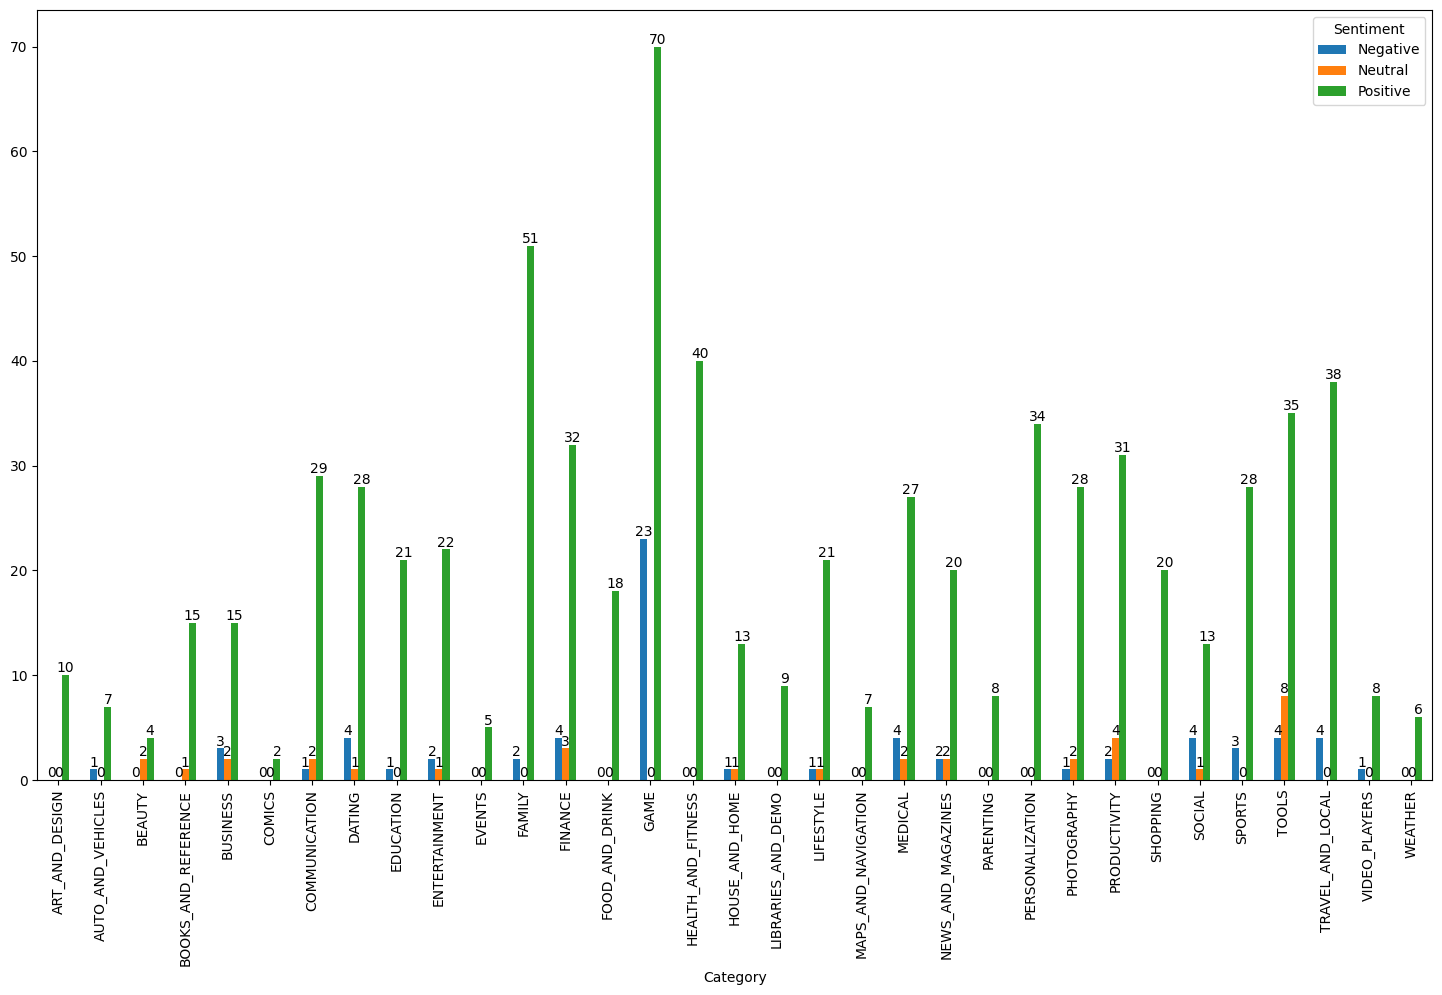

In [117]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (18, 10)


df = app_rev.groupby(['Category', 'Sentiment']).size().unstack().fillna(0)

ax = df.plot(kind='bar', stacked=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

plt.show()

<Axes: ylabel='count'>

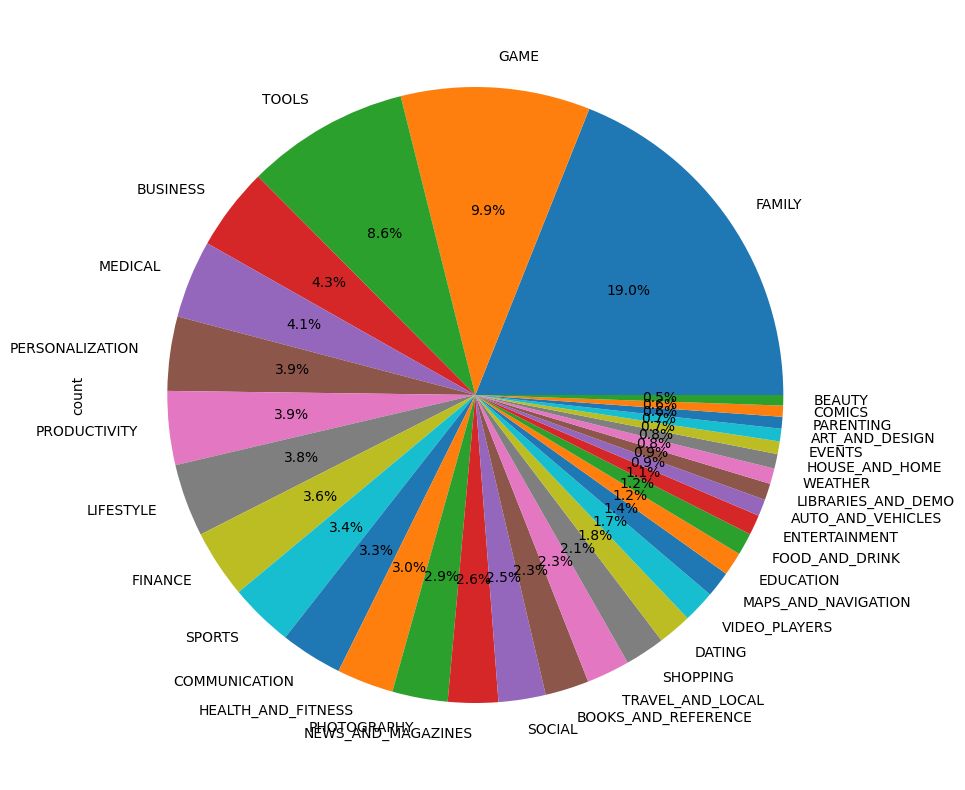

In [120]:
app_rev['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

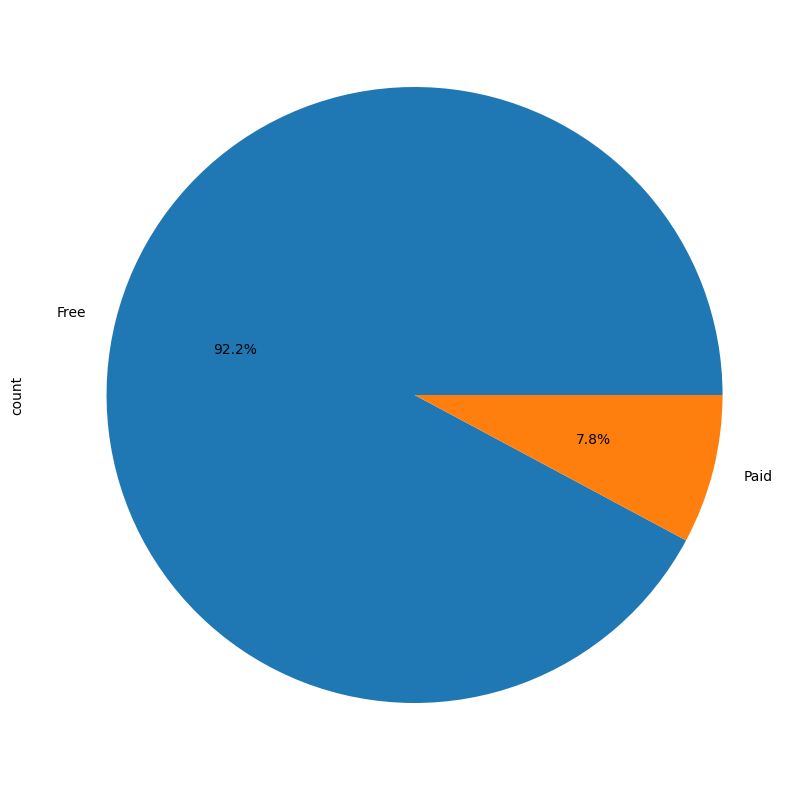

In [123]:
app_rev['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

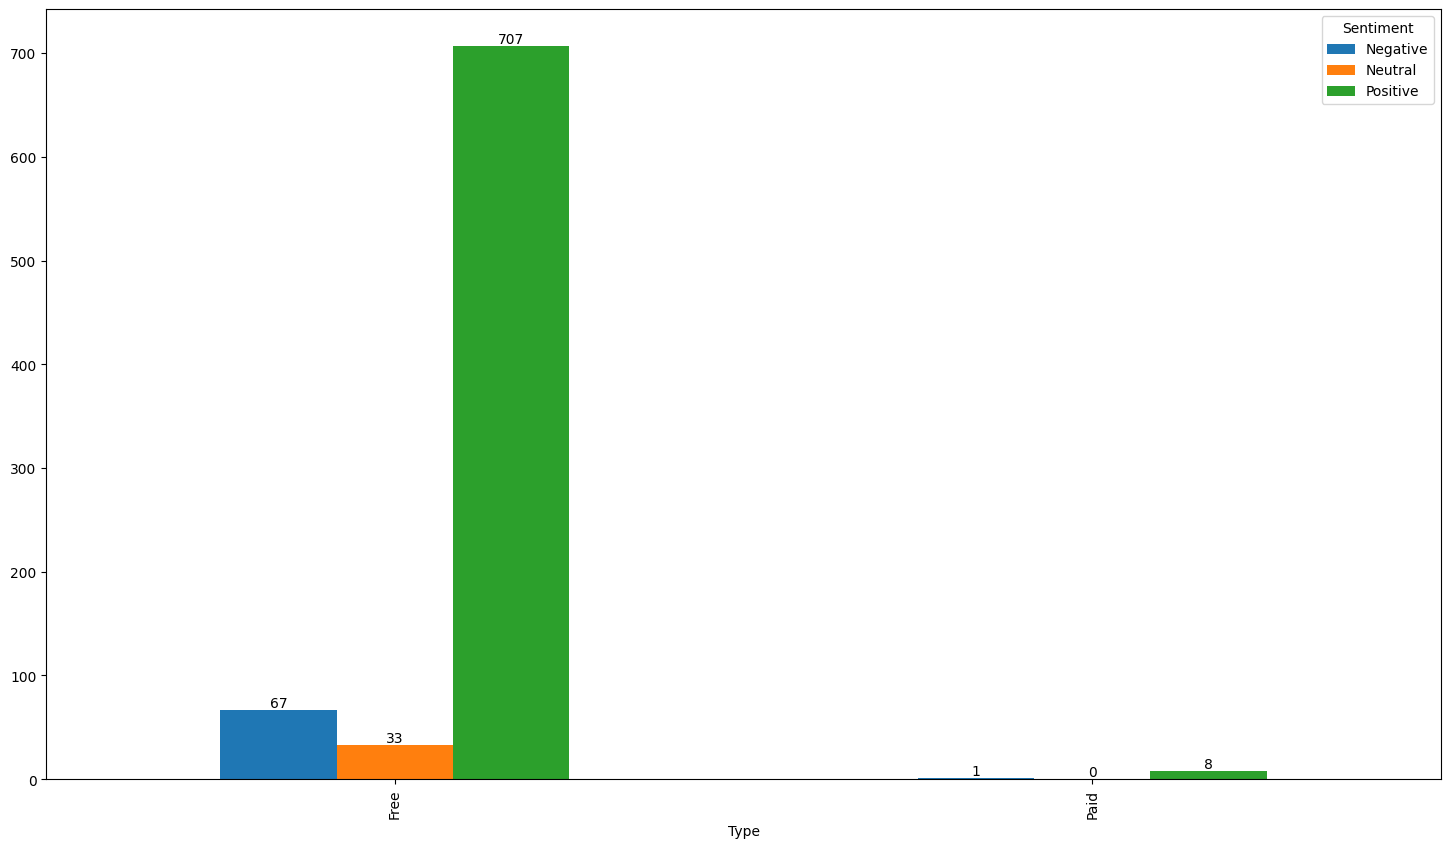

In [122]:
df = app_rev.groupby(['Type', 'Sentiment']).size().unstack().fillna(0)

ax = df.plot(kind='bar', stacked=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

plt.show()

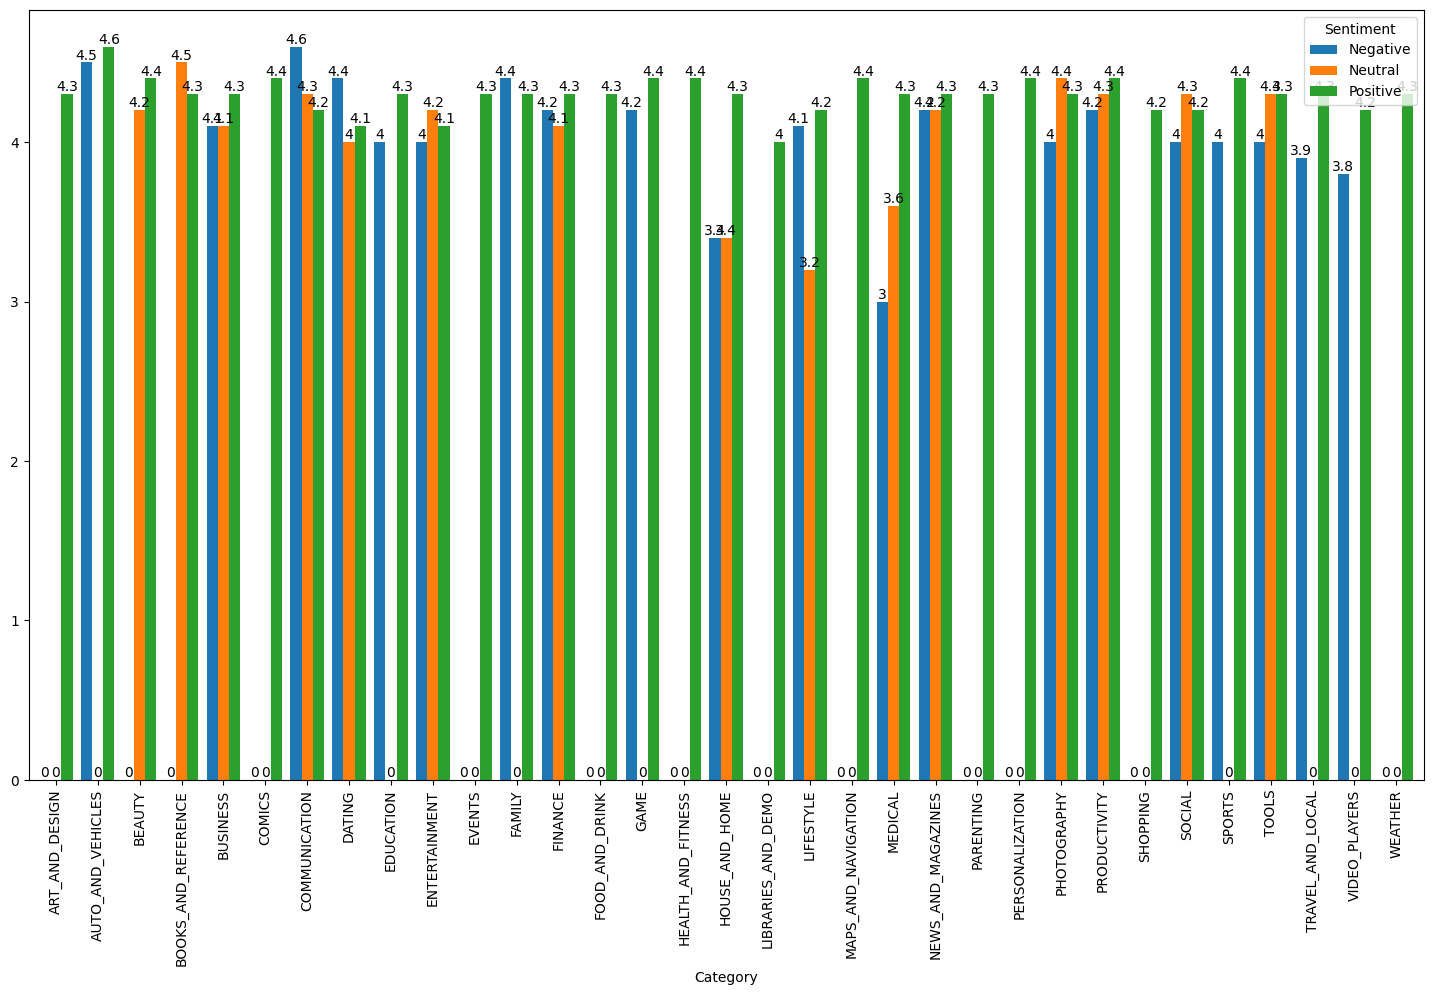

In [130]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (18, 10)


df = app_rev.groupby(['Category', 'Sentiment'])['Rating'].mean().round(1).unstack().fillna(0)

ax = df.plot(kind='bar', stacked=False, width=0.8)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

plt.show()